In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_labels.shape

(50000, 1)

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
test_labels.shape

(10000, 1)

In [ ]:
np.min(train_images), np.max(train_images)

(0, 255)

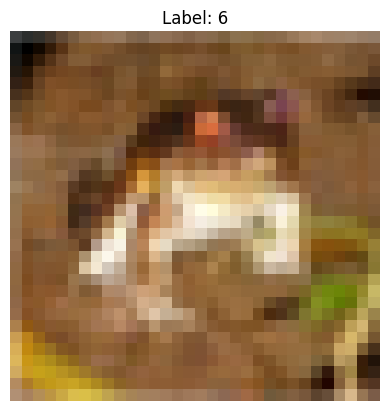

In [ ]:
plt.imshow(train_images[0])
plt.title(f"Label: {train_labels[0][0]}")
plt.axis('off')
plt.show()

Pixel values of the first training image:


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
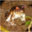

In [ ]:
print("Pixel values of the first training image:")
train_images[0]

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
np.min(train_images), np.max(train_images)

(0.0, 1.0)

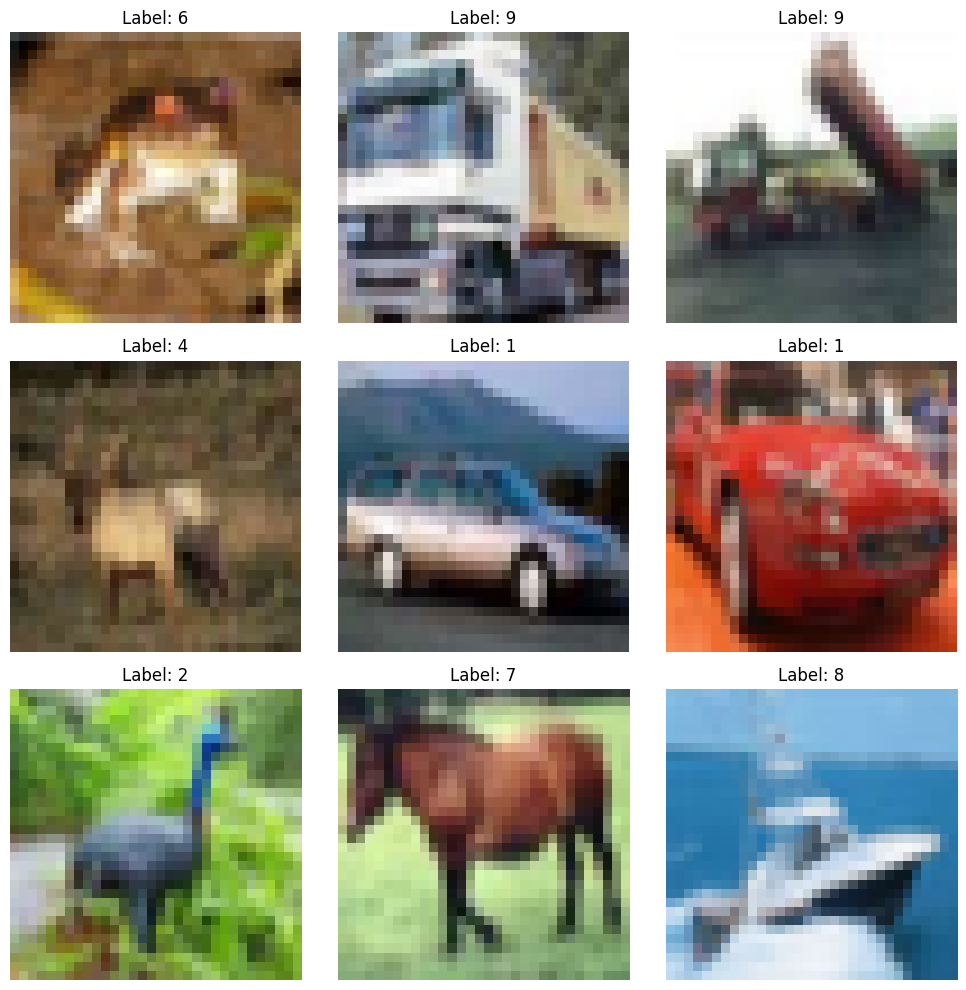

In [ ]:
num_images = 9
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Label: {train_labels[i][0]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

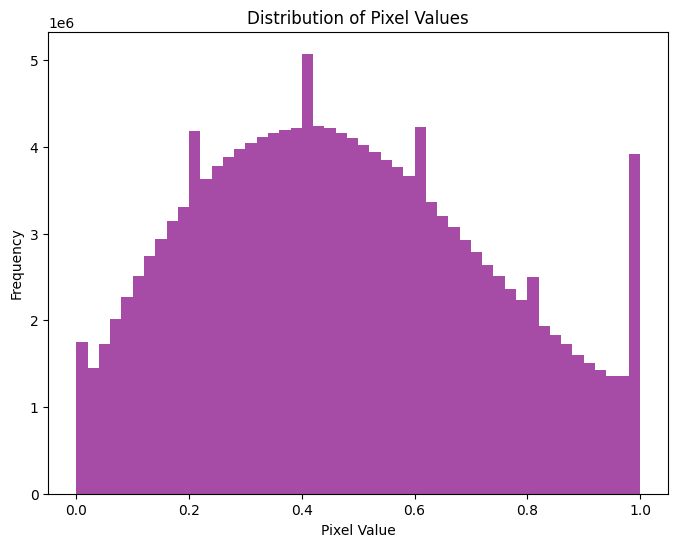

In [ ]:
train_image_pixels = train_images.flatten()
plt.figure(figsize=(8, 6))
plt.hist(train_image_pixels, bins=50, color='purple', alpha=0.7)
plt.title("Distribution of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

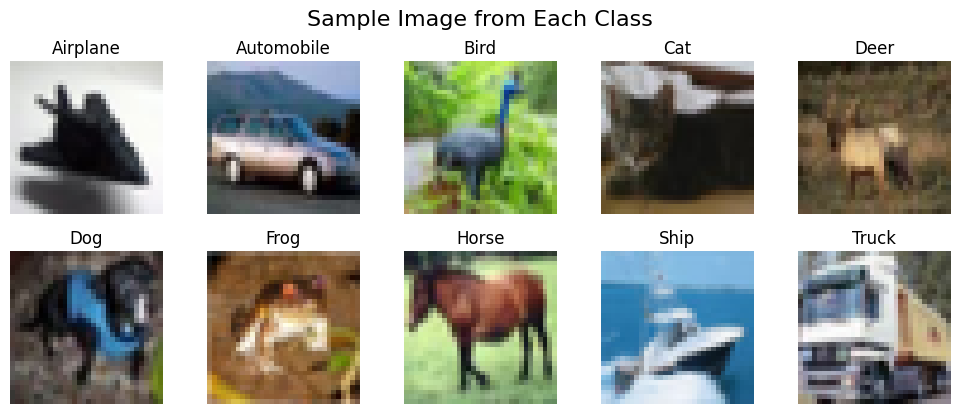

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10, 10))
for i in range(10):
    img = np.where(train_labels == i)[0][0]
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[img])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle("Sample Image From Each Class", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')


datagen.fit(train_images)


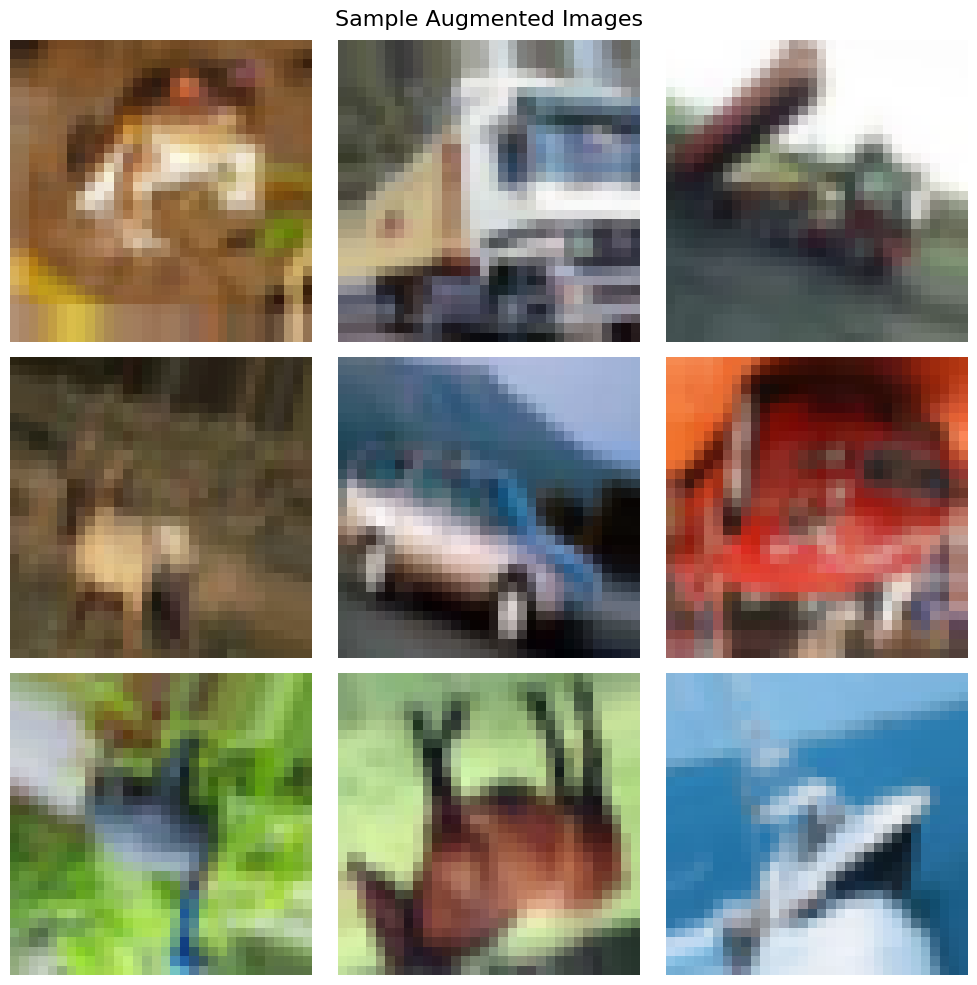

In [ ]:
num_augmented_images = 9
plt.figure(figsize=(10, 10))
for i in range(num_augmented_images):
    augmented_image = datagen.random_transform(train_images[i])
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image)
    plt.axis('off')
plt.suptitle("Sample Augmented Images", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(datagen.flow(train_images, train_labels, batch_size=32),
          epochs=500,
          validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 69ms/step - accuracy: 0.2520 - loss: 1.9976 - val_accuracy: 0.4153 - val_loss: 1.6176
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 70ms/step - accuracy: 0.3849 - loss: 1.6638 - val_accuracy: 0.4663 - val_loss: 1.4486
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.4309 - loss: 1.5612 - val_accuracy: 0.5182 - val_loss: 1.3445
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.4512 - loss: 1.5037 - val_accuracy: 0.5322 - val_loss: 1.3036
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 71ms/step - accuracy: 0.4726 - loss: 1.4606 - val_accuracy: 0.5363 - val_loss: 1.2877
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 66ms/step - accuracy: 0.4850 - loss: 1.4306 - val_accuracy: 0.5621 - val_loss: 1.2197
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.4937 - loss: 1.4155 - val_accuracy: 0.5585 - val_loss: 1.2433
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

NameError: name 'model' is not defined